In [1]:
#importing relevent modules

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import sys 

# Seting up project paths
wd = os.getcwd()
root_path = os.path.abspath(os.path.join(wd, '..'))
src_path = os.path.join(root_path, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
# Import Logistic Regression function
from logreg import logreg

# Define the datasets
data_path = os.path.join(root_path, '440data')
datasets ={}
datasets['volcanoes'] = os.path.join(data_path, 'volcanoes')
datasets['spam'] = os.path.join(data_path, 'spam')
datasets['voting'] = os.path.join(data_path, 'voting')



Running experiments on volcanoes dataset:

Lambda: 0
Accuracy: 0.822 0.000
Precision: 0.683 0.000
Recall: 0.854 0.000
Area under ROC: 0.913

Lambda: 0.001
Accuracy: 0.822 0.000
Precision: 0.683 0.000
Recall: 0.854 0.000
Area under ROC: 0.913

Lambda: 0.01
Accuracy: 0.820 0.000
Precision: 0.679 0.000
Recall: 0.854 0.000
Area under ROC: 0.913

Lambda: 0.1
Accuracy: 0.809 0.000
Precision: 0.657 0.000
Recall: 0.871 0.000
Area under ROC: 0.912

Running experiments on spam dataset:

Lambda: 0
Accuracy: 0.694 0.000
Precision: 0.730 0.000
Recall: 0.808 0.000
Area under ROC: 0.741

Lambda: 0.001
Accuracy: 0.694 0.000
Precision: 0.730 0.000
Recall: 0.808 0.000
Area under ROC: 0.741

Lambda: 0.01
Accuracy: 0.693 0.000
Precision: 0.730 0.000
Recall: 0.808 0.000
Area under ROC: 0.741

Lambda: 0.1
Accuracy: 0.691 0.000
Precision: 0.730 0.000
Recall: 0.801 0.000
Area under ROC: 0.742

Running experiments on voting dataset:

Lambda: 0
Accuracy: 0.986 0.000
Precision: 1.000 0.000
Recall: 0.969 0.000
A

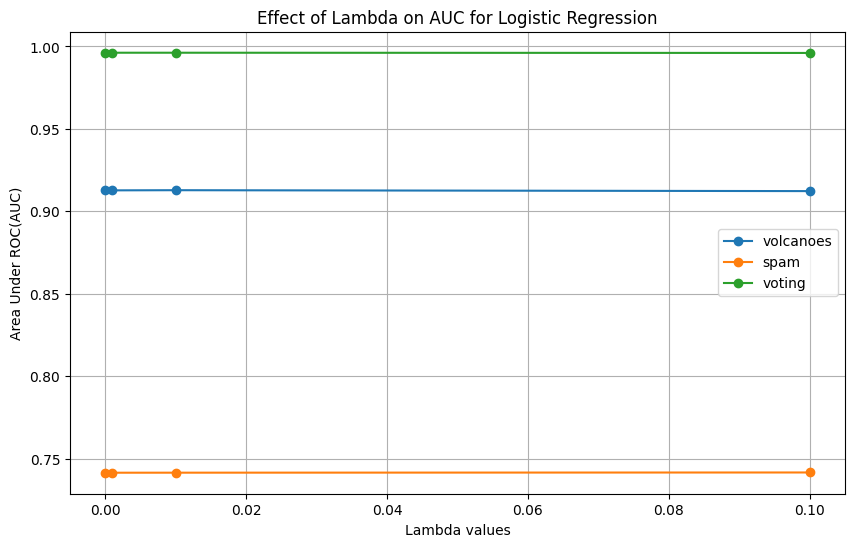

In [5]:

# Defining the lambda values for testing
lambda_values = [0, 0.001, 0.01, 0.1]

# initializing Dictionary to store results of AUC
auc_results={}
for dataset_name in datasets.keys():
    auc_results[dataset_name] =[]


# Running experiments  for each lambda value and each dataset
for dataset_name, dataset_path in datasets.items():
    print(f"\nRunning experiments for the {dataset_name} dataset:")
    for reg_lambda in lambda_values:
        print(f"\nLambda value: {reg_lambda}")
        # obtaining the resultrs from logreg function 
        lr_acc, lr_pre, lr_rec, lr_auc = logreg(
            data_path=dataset_path,
            use_cross_validation=False,  
            reg_lambda=reg_lambda
        )
        
       
        auc_results[dataset_name].append(lr_auc)

# Plot AUC vs. Lambda for each dataset
plt.figure(figsize=(10, 6))
for dataset_name, auc_values in auc_results.items():
    plt.plot(lambda_values, auc_values, label=dataset_name, marker='o')

plt.title("Effect of Lambda on AUC for Logistic Regression")
plt.legend()
plt.grid(True)
plt.xlabel("Lambda values")
plt.ylabel("Area Under ROC(AUC)")

plt.show()
